# Predicting Car Accident Severity

## Table of Contents
1. Introduction
2. Data
3. Methodology
4. Results
5. Discussion
6. Conclusion

## Introduction
Currently, insurance companies rely on claim adjusters to assess the extent of damage or injury associated with car accidents. 

The claim adjusters' opinions would then be used as a basis to set up reserves for future claim payouts. The process of claim assessment generally takes relatively long, and a typical insurance company would need to hire several claim adjusters for this purpose.

In this project, we will try to assign the severity type of an accident based on the data attributes. Specifically, this report will be targeted at insurance companies in the USA, which sell motor insurance policies to policyholders in Seattle. 

We will use machine learning models to predict the severity of accidents, which can then help insurance companies to assess the corresponding claims. 

## Data

We will be using the shared data for Seattle to solve the problem. The dataset has been provided by SPD and was recorded by Traffic Records.

The dataset contains attributes such as location of collision,collision type, number of people involved in the collision and the severity of the accident.

By developing a machine learning model based on the dataset, we will be able to predict the severity of an accident based on the attributes provided. This would then be used by insurance companies to automate the process of setting up claim reserves for car accidents. For each severity type, the claim reserve can be automatically set at a certain amount. For example, if the severity code is 1, the reserve amount can be set at $500. For cases with higher severity, the reserve amount would increase accordingly.

## Methodology
First, we will import the relevant libraries and data set.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Exploration
We will now explore the data.

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
cdf = df[['ADDRTYPE','COLLISIONTYPE','SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR']]
cdf.head(5)

,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Intersection,Angles,2,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,N
1,Block,Sideswipe,1,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,N
2,Block,Parked Car,1,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,N
3,Block,Other,1,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,N
4,Intersection,Angles,2,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,N


There are some blank fields under some of the features. We will assign null values to these fields.

In [7]:
cdf["ADDRTYPE"].fillna("No Address", inplace = True)
cdf["COLLISIONTYPE"].fillna("NA", inplace = True)
cdf["JUNCTIONTYPE"].fillna("Unknown", inplace = True)

cdf.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Intersection,Angles,2,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,N
1,Block,Sideswipe,1,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,N
2,Block,Parked Car,1,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,N
3,Block,Other,1,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,N
4,Intersection,Angles,2,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,N


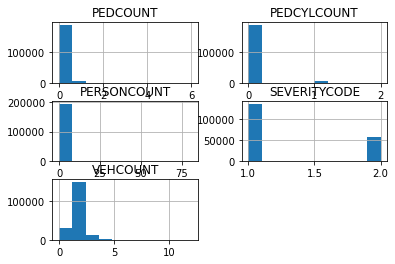

In [8]:
chart = cdf[['ADDRTYPE','COLLISIONTYPE','SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]
chart.hist()
plt.show()

### Feature Set
We will now define the feature set X. 

In [9]:
X = cdf[['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR']].values
X[0:5]

array([['Intersection', 'Angles',
        'At Intersection (intersection related)', 2, 0, 0, 2, 0, 0, 'N'],
       ['Block', 'Sideswipe', 'Mid-Block (not related to intersection)',
        2, 0, 0, 2, 0, 0, 'N'],
       ['Block', 'Parked Car', 'Mid-Block (not related to intersection)',
        4, 0, 0, 3, 0, 0, 'N'],
       ['Block', 'Other', 'Mid-Block (not related to intersection)', 3,
        0, 0, 3, 0, 0, 'N'],
       ['Intersection', 'Angles',
        'At Intersection (intersection related)', 2, 0, 0, 2, 0, 0, 'N']],
      dtype=object)

In [10]:
le_addrtype = preprocessing.LabelEncoder()
le_addrtype.fit(['Alley','Block','Intersection','No Address'])
X[:,0] = le_addrtype.transform(X[:,0]) 

le_collisiontype = preprocessing.LabelEncoder()
le_collisiontype.fit(['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe','NA'])
X[:,1] = le_collisiontype.transform(X[:,1]) 

le_junctiontype = preprocessing.LabelEncoder()
le_junctiontype.fit(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'])
X[:,2] = le_junctiontype.transform(X[:,2]) 

le_hitparkedcar = preprocessing.LabelEncoder()
le_hitparkedcar.fit(['Y','N'])
X[:,9] = le_hitparkedcar.transform(X[:,9]) 

X[0:5]

array([[2, 0, 1, 2, 0, 0, 2, 0, 0, 0],
       [1, 10, 4, 2, 0, 0, 2, 0, 0, 0],
       [1, 6, 4, 4, 0, 0, 3, 0, 0, 0],
       [1, 5, 4, 3, 0, 0, 3, 0, 0, 0],
       [2, 0, 1, 2, 0, 0, 2, 0, 0, 0]], dtype=object)

In [11]:
Y = cdf[['SEVERITYCODE']].values
Y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

### Normalize data
Data standardization give data zero mean and unit variance.

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.28668708, -1.64971175, -1.24091477, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783, -0.08124849, -0.13536153, -0.19619929],
       [-0.69338623,  1.53541101,  0.79534134, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783, -0.08124849, -0.13536153, -0.19619929],
       [-0.69338623,  0.26136191,  0.79534134,  1.15576451, -0.18743029,
        -0.16958841,  1.7102107 , -0.08124849, -0.13536153, -0.19619929],
       [-0.69338623, -0.05715037,  0.79534134,  0.41278122, -0.18743029,
        -0.16958841,  1.7102107 , -0.08124849, -0.13536153, -0.19619929],
       [ 1.28668708, -1.64971175, -1.24091477, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783, -0.08124849, -0.13536153, -0.19619929]])

### K Nearest Neighbour Model

### Train test split
We will now split the dataset into training and test datasets for the k nearest neighbour model.

In [13]:
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set:', X_test_knn.shape,  y_test_knn.shape)

Train set: (155738, 10) (155738, 1)
Test set: (38935, 10) (38935, 1)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [15]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,np.ravel(y_train_knn,order='C'))
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting
We can use the model to predict the test set:

In [16]:
yhat = neigh.predict(X_test_knn)
yhat[0:5]

array([2, 1, 1, 1, 1])

### Accuracy evaluation

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_knn, yhat))

Train set Accuracy:  0.7397680720183899
Test set Accuracy:  0.7372543983562347


### Decision Tree Model

### Train test split
We will now split the dataset into training and test datasets for the k nearest neighbour model.

In [18]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train_tree.shape,  y_train_tree.shape)
print ('Test set:', X_test_tree.shape,  y_test_tree.shape)

Train set: (155738, 10) (155738, 1)
Test set: (38935, 10) (38935, 1)


In [19]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
Tree.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction based on test dataset

In [21]:
predTree = Tree.predict(X_test_tree)

### Accuracy evaluation

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_tree, predTree))

DecisionTrees's Accuracy:  0.7530756388853217


### Logistic Regression Model

### Train test split

In [24]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train_lr.shape,  y_train_lr.shape)
print ('Test set:', X_test_lr.shape,  y_test_lr.shape)

Train set: (155738, 10) (155738, 1)
Test set: (38935, 10) (38935, 1)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr,y_train_lr)
LR

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction based on test dataset

In [26]:
yhat_lr = LR.predict(X_test_lr)
yhat_lr

array([1, 1, 1, ..., 1, 1, 1])

### Accuracy evaluation 

We will use jaccard index for accuracy evaluation.

In [28]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test_lr, yhat_lr)

0.7552844484397072

## Results

I have used three different machine learning methods to predict the car accident severity, namely k nearest neighbour, decision tree and logistics regression. Based on the accuracy evaluations for each of these methods, logistic regression appears to be the method with highest accuracy.

Therefore I would recommend the use of logistic regression to predict car accident severity in this scenario.

## Discussion

There are some data issues which may need to be addressed, for improved accuracy of the model.
Firstly, there are many blank fields in the dataset, which suggest that the dataset may be incomplete. Further actions may need to be taken to ensure data integrtiy.
Also, the sample size is relatively small. The accuracy of the model may be compromised if there is bias in the dataset.

## Conclusion

Based on the data provided, we can develop a logistic regression model to predict car accident severity in Seattle, for the consumption of insurance companies. However, some data issues may need to be addressed to ensure the robustness of the model.